In [2]:
#Blob Detection using Laplacian of Gaussian (LoG) and Difference of Gaussian (DoG)

In [4]:
#Laplacian of Gaussian (LoG) Implementation:

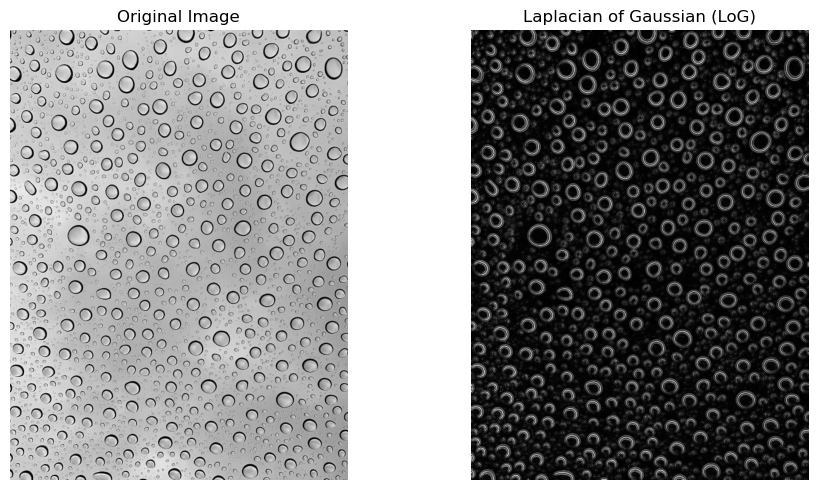

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/sahoo/Downloads/bubble.jpeg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Laplacian of Gaussian (LoG)
log = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert to 8-bit image for visualization
log_abs = cv2.convertScaleAbs(log)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_abs, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [13]:
#Difference of Gaussian (DoG) Implementation:

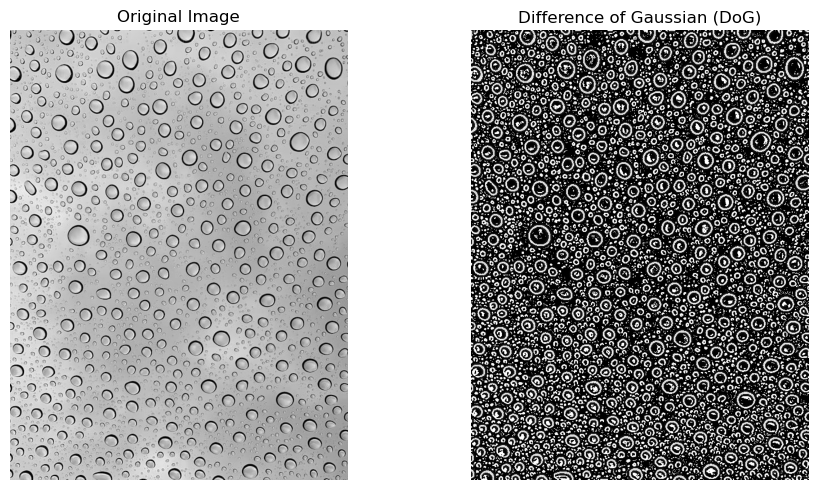

In [14]:
# Apply Gaussian Blur with two different kernel sizes
blurred1 = cv2.GaussianBlur(img, (5, 5), 0)
blurred2 = cv2.GaussianBlur(img, (9, 9), 0)

# Compute the Difference of Gaussian (DoG)
dog = blurred1 - blurred2

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dog, cmap='gray')
plt.title("Difference of Gaussian (DoG)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [15]:
#Blob Detection using OpenCV’s SimpleBlobDetector

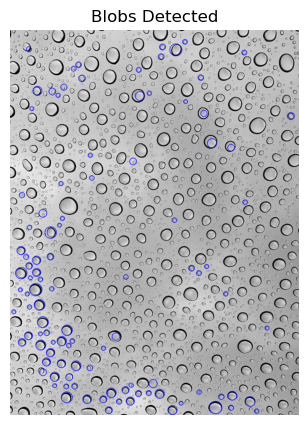

In [16]:
# Parameters for SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 50
params.maxArea = 2000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# Create a SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(img)

# Draw detected blobs as red circles
blob_image = cv2.drawKeypoints(img, keypoints, None, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(blob_image, cmap='gray')
plt.title("Blobs Detected")
plt.axis("off")
plt.show()


In [17]:
#Blob Detection on Color Images


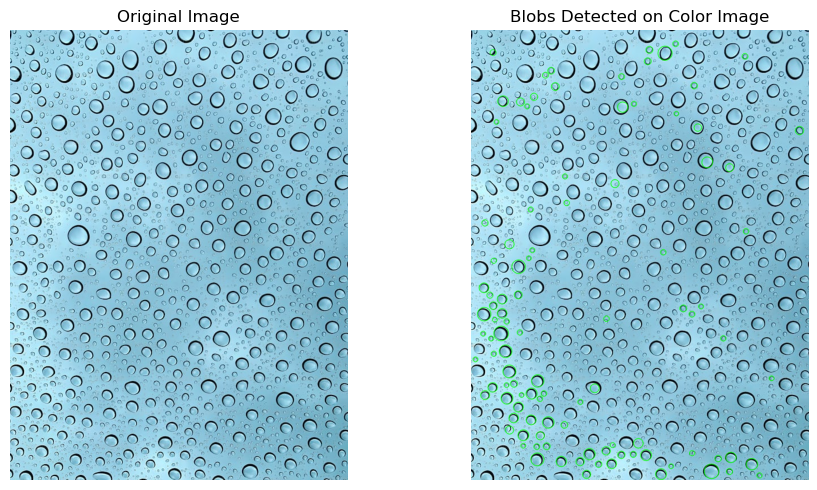

In [18]:
# Load the image in color
color_img = cv2.imread(image_path)

# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Detect blobs on grayscale
keypoints = detector.detect(gray_img)

# Draw detected blobs on the original color image
blob_image_color = cv2.drawKeypoints(color_img, keypoints, None, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blob_image_color, cv2.COLOR_BGR2RGB))
plt.title("Blobs Detected on Color Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [19]:
#Harris Corner Detection

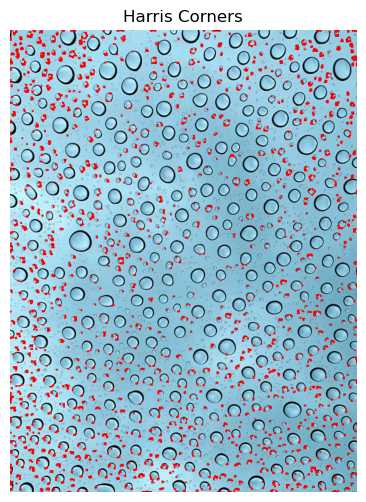

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/sahoo/Downloads/bubble.jpeg"  # Replace with the path to your image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)

# Threshold for corner detection
threshold = 0.01 * dst.max()
image[dst > threshold] = [0, 0, 255]

# Convert image to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with corners
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Harris Corners")
plt.axis("off")
plt.show()


In [25]:
#Shi-Tomasi Corner Detection

C:\Windows\Temp\ipykernel_5340\3314830789.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


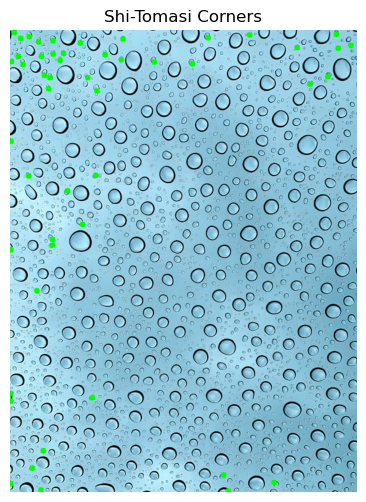

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/sahoo/Downloads/bubble.jpeg"  # Replace with the path to your image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Mark the corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Convert image to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with corners
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Shi-Tomasi Corners")
plt.axis("off")
plt.show()
